Try to figure out the state of this old data ...

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pyuvdata import UVData, UVCal

In [2]:
oldpath = '/lustre/aoc/projects/hera/plaplant/HERA19Golden/'
newpath = '/lustre/aoc/projects/hera/jaguirre/HERA19Summer2020/'

In [11]:
%%time
uvdcal = UVData()
uvdcal.read(oldpath+'CalibratedData/2457548/zen.2457548.64018.xx.HH.uvcRPCS.uvh5')

LST values stored in /lustre/aoc/projects/hera/plaplant/HERA19Golden/CalibratedData/2457548/zen.2457548.64018.xx.HH.uvcRPCS.uvh5 are not self-consistent with time_array and telescope location. Consider recomputing with utils.get_lst_for_time.


CPU times: user 174 ms, sys: 161 ms, total: 335 ms
Wall time: 565 ms


In [16]:
uvdcal.telescope_location_lat_lon_alt_degrees

(-0.5361918109651229, 0.37399448506783717, 1073.0000000158325)

In [20]:
antpos_cal, ants_cal = uvdcal.get_ENU_antpos(center=True, pick_data_ants=True)

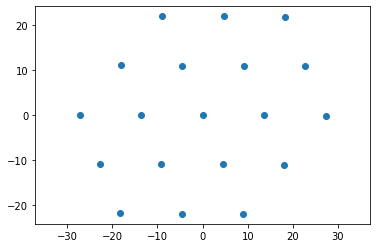

In [29]:
plt.plot(antpos_cal[:,0], antpos_cal[:,1], 'o')
plt.axis('equal')
plt.show()

In [15]:
# Note that reading zen.2457548.64018.xx.HH.uvcRP.uvh5 is not compatible with current pyuvdata
uvdraw = UVData()
uvdraw.read(oldpath+'RawData/2457548/zen.2457548.64018.xx.HH.uvcRP')

In [17]:
uvdraw.telescope_location_lat_lon_alt_degrees

(-30.72152777777797, 21.428305555555557, 1073.0000000121072)

In [30]:
antpos_raw, ants_raw = uvdraw.get_ENU_antpos(center=True, pick_data_ants=True)

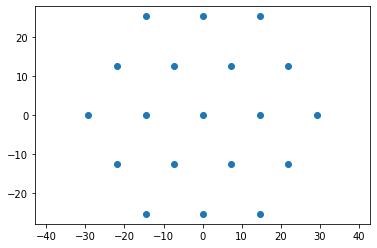

In [31]:
plt.plot(antpos_raw[:,0], antpos_raw[:,1], 'o')
plt.axis('equal')
plt.show()

In [8]:
uvd2 = UVData()

In [9]:
%%time
uvd2.read('/lustre/aoc/projects/hera/H1C_IDR2/IDR2_2/2458098/zen.2458098.64748.HH.uvh5')

In [10]:
uvd2.telescope_location_lat_lon_alt_degrees

(-30.721526120689443, 21.428303826863015, 1051.6900000134483)

In [33]:
antpos_h1c, ants_h1c = uvd2.get_ENU_antpos(center=True, pick_data_ants=True)

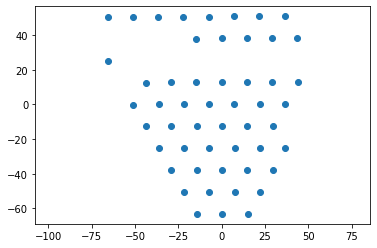

In [34]:
plt.plot(antpos_h1c[:,0], antpos_h1c[:,1], 'o')
plt.axis('equal')
plt.show()

In [35]:
antpos_h1c

array([[-6.58319322e+01,  5.04677396e+01, -4.15771382e-01],
       [-7.40056882e+00,  5.06908862e+01, -5.34605728e-01],
       [-4.83151084e-02,  3.80619764e+01, -4.04503178e-01],
       [ 4.38718348e+01,  1.29257353e+01, -6.41167003e-02],
       [ 3.67128449e+01, -2.50525613e+01,  2.55506366e-01],
       [ 1.46561555e+01,  1.28141614e+01, -1.54398733e-01],
       [-3.63263619e+01, -2.53315001e+01,  2.44467064e-01],
       [-2.90707749e+01, -1.26468001e+01,  1.04740166e-01],
       [-4.36786163e+01, -1.27025876e+01,  9.44487487e-02],
       [-6.57353061e+01,  2.51641360e+01, -1.15807676e-01],
       [ 2.91673638e+01,  3.81735501e+01, -3.64154306e-01],
       [ 4.37752033e+01,  3.82293369e+01, -3.64030003e-01],
       [-5.10308333e+01, -8.36812718e-02,  4.39679509e-03],
       [-5.12240886e+01,  5.05235262e+01, -5.45429833e-01],
       [-4.37752081e+01,  1.25910122e+01, -1.15363855e-01],
       [-1.46561551e+01,  3.80061896e+01, -4.04727747e-01],
       [ 3.64229492e+01,  5.08582462e+01

In [36]:
from glob import glob

In [37]:
glob(oldpath+'RawData/2457548/zen.2457548.64018.*.HH.uvcRP')

['/lustre/aoc/projects/hera/plaplant/HERA19Golden/RawData/2457548/zen.2457548.64018.yy.HH.uvcRP',
 '/lustre/aoc/projects/hera/plaplant/HERA19Golden/RawData/2457548/zen.2457548.64018.xy.HH.uvcRP',
 '/lustre/aoc/projects/hera/plaplant/HERA19Golden/RawData/2457548/zen.2457548.64018.xx.HH.uvcRP',
 '/lustre/aoc/projects/hera/plaplant/HERA19Golden/RawData/2457548/zen.2457548.64018.yx.HH.uvcRP']

In [38]:
uvdraw.read(glob(oldpath+'RawData/2457548/zen.2457548.64018.*.HH.uvcRP'))

In [45]:
uvdraw.write_uvh5(newpath+'2457548/zen.2457548.64018.uvcRP.uvh5')

In [40]:
uvdtest = UVData()
uvdtest.read(glob(oldpath+'RawData/2457548/zen.2457548.64018.xx.HH.uvcRP'))

In [41]:
uvdtest.data_array.shape

(10640, 1, 1024, 1)

In [42]:
uvdtest.polarization_array

array([-5])

In [ ]:
# Check for whether all the data are flagged and whether the sun is up